<a href="https://colab.research.google.com/github/yohanes-erwin/notebook/blob/main/mnist_digit_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%tensorflow_version 2.x
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


### Data Preprocessing

Melakukan import dataset MNIST dari Keras, split data menjadi traning dan test, reshape ukuran matriks, dan encoding label secara kategorical.

In [2]:
# Load data
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()

In [3]:
# Feature dan label
train_images, train_labels = train_data
test_images, test_labels = test_data

In [4]:
# Reshape menjadi 4D
X_train = train_images.reshape((60000, 28, 28, 1))
X_test = test_images.reshape((10000, 28, 28, 1))

In [5]:
# Normalisasi
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [6]:
# Encoding label dengan one hot encoding
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

Melihat ukuran matrix dan visualisasi image, label, dan encoding.

In [7]:
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

Training Images: (60000, 28, 28, 1)
Testing Images: (10000, 28, 28, 1)
Training Labels: (60000, 10)
Test Labels: (10000, 10)


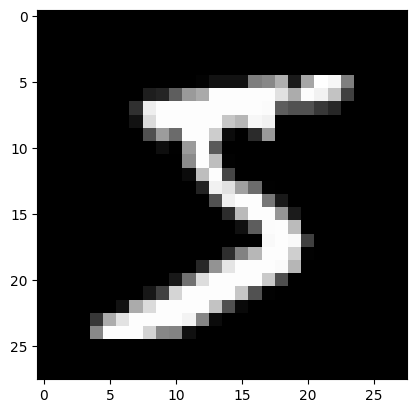

In [8]:
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
train_labels[0]

5

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Convolutional Neural Network

Membuat model convolutional neural network.

In [11]:
# Model sekuensial
model = tf.keras.models.Sequential()

In [12]:
# Menambahkan layer
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [13]:
# Rangkuman model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [14]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training model dengan 10 epochs, batch size 128.

In [15]:
num_epochs = 10
batch_size = 128

In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 62s 119ms/step - loss: 0.2500 - accuracy: 0.9278 - val_loss: 0.0542 - val_accuracy: 0.9823
Epoch 2/10
469/469 [==============================] - 49s 105ms/step - loss: 0.0575 - accuracy: 0.9821 - val_loss: 0.0478 - val_accuracy: 0.9848
Epoch 3/10
469/469 [==============================] - 47s 100ms/step - loss: 0.0398 - accuracy: 0.9874 - val_loss: 0.0331 - val_accuracy: 0.9882
Epoch 4/10
469/469 [==============================] - 49s 105ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0277 - val_accuracy: 0.9913
Epoch 5/10
469/469 [==============================] - 47s 100ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0302 - val_accuracy: 0.9904
Epoch 6/10
469/469 [==============================] - 47s 101ms/step - loss: 0.0215 - accuracy: 0.9934 - val_loss: 0.0314 - val_accuracy: 0.9883
Epoch 7/10
469/469 [==============================] - 51s 108ms/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0317 - val_ac

Menampilkan metrics hasil traning untuk evaluasi.

In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 [==============================] - 4s 14ms/step - loss: 0.0343 - accuracy: 0.9903
Test Accuracy: 0.9902999997138977
Test Loss: 0.03433768451213837


Simpan metrics untuk setiap epoch agar dapat melakukan plot kurva loss dan accuracy.

In [18]:
metrics = history.history

In [19]:
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

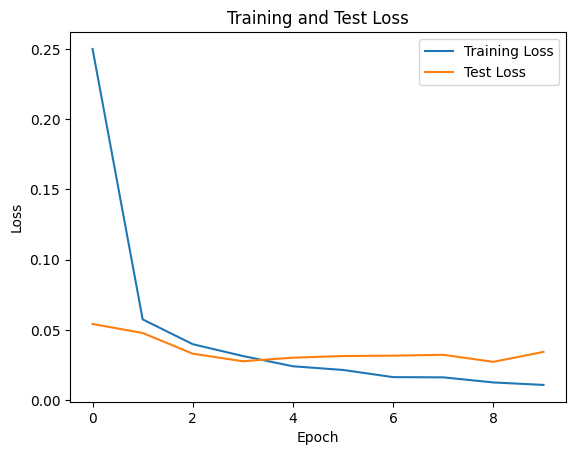

In [20]:
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

In [21]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

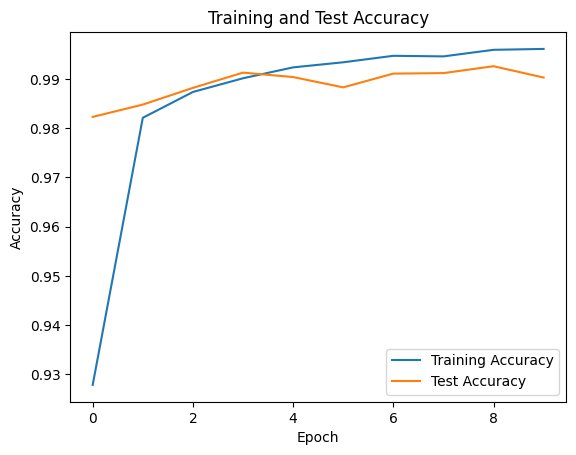

In [22]:
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

### Inference

Melakukan prediksi dengan model yang sudah di-training.

In [23]:
predictions = model.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [24]:
index = 0

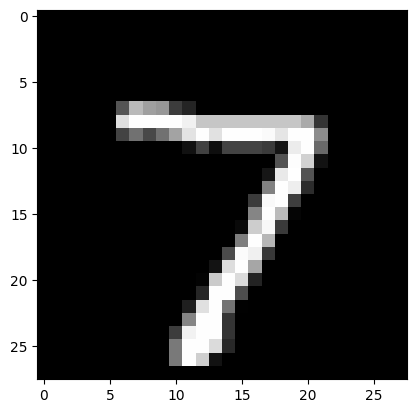

In [25]:
plt.imshow(test_images[index], cmap=plt.get_cmap('gray'))
plt.show()

In [26]:
print("Prediction:", np.argmax(predictions[index]))

Prediction: 7
